In [45]:
from glob import glob
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.optimize import curve_fit

In [8]:
all_dark_fits = glob("./DarkMeasurements/dark*.fits")
all_bias_fits = glob("./DarkMeasurements/bias*.fits")

print(all_dark_fits)

['./DarkMeasurements\\dark_0000.fits', './DarkMeasurements\\dark_0001.fits', './DarkMeasurements\\dark_0002.fits', './DarkMeasurements\\dark_0003.fits', './DarkMeasurements\\dark_0004.fits', './DarkMeasurements\\dark_0005.fits', './DarkMeasurements\\dark_0006.fits', './DarkMeasurements\\dark_0007.fits', './DarkMeasurements\\dark_0008.fits', './DarkMeasurements\\dark_0009.fits', './DarkMeasurements\\dark_0010.fits', './DarkMeasurements\\dark_0011.fits', './DarkMeasurements\\dark_0012.fits', './DarkMeasurements\\dark_0013.fits', './DarkMeasurements\\dark_0014.fits', './DarkMeasurements\\dark_0015.fits', './DarkMeasurements\\dark_0016.fits', './DarkMeasurements\\dark_0017.fits', './DarkMeasurements\\dark_0018.fits', './DarkMeasurements\\dark_0019.fits', './DarkMeasurements\\dark_0020.fits', './DarkMeasurements\\dark_0021.fits', './DarkMeasurements\\dark_0022.fits', './DarkMeasurements\\dark_0023.fits', './DarkMeasurements\\dark_0024.fits', './DarkMeasurements\\dark_0025.fits', './DarkMeas

In [51]:
temperatures = []

for path in all_dark_fits:
    hdul = fits.open(path)
    #hdul.info()
    temperatures.append(hdul[0].header['CCDTEMP'])
    image = hdul[0].data
    print("Opening image ", path)
    print("Dimension of data: ", image.shape)
    overscan_region = image[:,1030:]
    print('Dimension of or: ', overscan_region.shape)
    #rint("Printing original image:")
    #print(image)
    #rint("Printing overscan region")
    #rint(overscan_region)
    
    median_bias = np.median(overscan_region)
    std_bias = np.std(overscan_region)
    print(median_bias)
    print(std_bias)
    
    corrected_image = image - median_bias
    print(corrected_image)
    hdul_corrected = hdul
    hdul_corrected[0].data = corrected_image
    fits.writeto("./DarkMeasurements/BiasCorrected/" +path[18:28] + "_bias_corrected" + path[28:], corrected_image, overwrite=True)

Opening image  ./DarkMeasurements\dark_0000.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3782.0
53.25095310128325
[[  -89. -3260. -2147. ...    68.    74.    95.]
 [ 3304.   329.  1144. ...    70.    45.    91.]
 [ 3247.   370.  1112. ...    52.    64.   110.]
 ...
 [ 2223.  -347.   455. ...    97.   123.   153.]
 [ 2231.  -365.   458. ...    85.    68.   109.]
 [ 2125.  -323.   415. ...   103.    95.   118.]]
Opening image  ./DarkMeasurements\dark_0001.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3797.0
44.90229490475116
[[ -662. -3661. -2613. ...    44.    87.    64.]
 [ 3087.   155.   960. ...    21.    90.    37.]
 [ 3058.   230.   894. ...    32.    73.    78.]
 ...
 [ 2036.  -356.   368. ...    55.   111.    84.]
 [ 2058.  -371.   343. ...    67.   119.    88.]
 [ 2072.  -341.   312. ...    60.   111.    93.]]
Opening image  ./DarkMeasurements\dark_0002.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3805.0
40.1271445

26.713633217335204
[[1955. -575.    2. ...   16.  -19.  -39.]
 [1498. -533.   -8. ...    7.  -31.   -8.]
 [1465. -507.   37. ...   27.  -21.  -23.]
 ...
 [1508. -570.   37. ...   53.   -9.   12.]
 [1503. -549.  -10. ...   44.    6.  -11.]
 [1500. -575.    5. ...   54.  -11.  -25.]]
Opening image  ./DarkMeasurements\dark_0019.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3874.0
27.515667088187772
[[1979. -614.   32. ...  -15.  -25.   51.]
 [1471. -568.   83. ...  -27.  -20.   32.]
 [1524. -581.   71. ...   -2.  -56.  -21.]
 ...
 [1432. -557.   43. ...    6.  -13.   49.]
 [1446. -564.   35. ...   10.   -5.   50.]
 [1483. -574.   76. ...   23.  -12.   43.]]
Opening image  ./DarkMeasurements\dark_0020.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3874.0
27.664465231884787
[[1973. -596.   71. ...   -7.  -36.   46.]
 [1451. -585.   69. ...    0.  -22.    2.]
 [1445. -562.   52. ...  -18.  -49.   26.]
 ...
 [1439. -567.   46. ...    7.  -12.   10.]
 [

3871.0
28.210059242490583
[[ 1.980e+03 -4.830e+02  1.330e+02 ... -2.300e+01 -2.900e+01  7.000e+00]
 [ 1.304e+03 -5.620e+02 -1.100e+01 ... -3.200e+01 -3.500e+01  5.400e+01]
 [ 1.313e+03 -5.590e+02  1.900e+01 ... -2.300e+01 -1.300e+01 -2.400e+01]
 ...
 [ 1.351e+03 -5.330e+02  4.400e+01 ... -3.300e+01  1.000e+01  2.000e+01]
 [ 1.367e+03 -5.620e+02  1.600e+01 ...  3.000e+00  1.000e+00  3.200e+01]
 [ 1.350e+03 -5.220e+02  2.200e+01 ... -7.000e+00 -2.300e+01  1.000e+01]]
Opening image  ./DarkMeasurements\dark_0037.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3871.0
28.42280327604852
[[   42. -2293. -1587. ...     0.   -56.    30.]
 [ 1314.  -598.     0. ...   -53.    37.     4.]
 [ 1332.  -542.   -10. ...    -5.   -42.    52.]
 ...
 [ 1366.  -591.    68. ...   -18.     8.    24.]
 [ 1317.  -578.    32. ...   -17.   -23.    22.]
 [ 1352.  -557.    41. ...    -3.     3.    42.]]
Opening image  ./DarkMeasurements\dark_0038.fits
Dimension of data:  (1024, 1050)
Dimension of

Opening image  ./DarkMeasurements\dark_0055.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3860.0
28.413063885538786
[[1792. -415.    9. ...  -22.  -20.    4.]
 [1271. -508.  -49. ...  -36.   22.  -33.]
 [1214. -443.  -30. ...  -52.   15.  -10.]
 ...
 [1289. -486.    6. ...  -33.   29.   -2.]
 [1276. -463.  -14. ...  -53.   21.  -33.]
 [1271. -473.  -35. ...    6.   18.   24.]]
Opening image  ./DarkMeasurements\dark_0056.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3859.0
28.748472550948875
[[1777. -515.   37. ...  -45.  -36.   -3.]
 [1222. -530.  -14. ...  -42.   32.   26.]
 [1199. -520.   -5. ...  -43.  -40.   59.]
 ...
 [1203. -469.   35. ...   29.  -47.   39.]
 [1250. -512.    9. ...    9.   -4.   22.]
 [1258. -491.    8. ...  -13.  -39.   46.]]
Opening image  ./DarkMeasurements\dark_0057.fits
Dimension of data:  (1024, 1050)
Dimension of or:  (1024, 20)
3856.0
27.928185972215697
[[1705. -533.  -50. ...   14.  -57.  -17.]
 [1175. -478.  -41

TypeError: can only concatenate list (not "float") to list

In [52]:
for path in all_bias_fits:
    hdul = fits.open(path)
    image = hdul[0].data
    print("Opening image ", path)
    print(image.shape)
    print(image)

Opening image  ./DarkMeasurements\bias_0000.fits
(1024, 1050)
[[6220 3818 4491 ... 3926 3908 3900]
 [5567 3332 3988 ... 3877 3917 3940]
 [5524 3342 3963 ... 3908 3931 3949]
 ...
 [5578 3358 3942 ... 3871 3937 3907]
 [5578 3343 3974 ... 3901 3922 3932]
 [5530 3332 3980 ... 3882 3924 3954]]
Opening image  ./DarkMeasurements\bias_0001.fits
(1024, 1050)
[[6194 3641 4270 ... 3934 3925 3875]
 [5615 3280 3944 ... 3905 3922 3895]
 [5621 3298 3969 ... 3954 3918 3884]
 ...
 [5554 3333 3919 ... 3943 3905 3888]
 [5532 3311 3957 ... 3930 3915 3892]
 [5526 3314 3912 ... 3949 3904 3889]]
Opening image  ./DarkMeasurements\bias_0002.fits
(1024, 1050)
[[6142 3586 4234 ... 3908 3853 3923]
 [5588 3241 3969 ... 3865 3876 3937]
 [5602 3277 3943 ... 3870 3891 3879]
 ...
 [5539 3316 3953 ... 3898 3876 3953]
 [5556 3270 3929 ... 3890 3888 3955]
 [5546 3284 3999 ... 3878 3876 3923]]
Opening image  ./DarkMeasurements\bias_0003.fits
(1024, 1050)
[[6052 3552 4206 ... 3884 3860 3927]
 [5503 3244 3965 ... 3886 3840 

Opening image  ./DarkMeasurements\bias_0056.fits
(1024, 1050)
[[5659 3265 3881 ... 3837 3825 3885]
 [5133 3302 3904 ... 3847 3845 3899]
 [5176 3317 3882 ... 3836 3831 3887]
 ...
 [5153 3313 3877 ... 3821 3820 3871]
 [5135 3338 3867 ... 3849 3821 3895]
 [5147 3341 3933 ... 3854 3871 3893]]
Opening image  ./DarkMeasurements\bias_0057.fits
(1024, 1050)
[[5680 3370 3861 ... 3833 3873 3863]
 [5117 3323 3839 ... 3866 3892 3855]
 [5166 3397 3869 ... 3804 3888 3826]
 ...
 [5105 3390 3851 ... 3840 3911 3855]
 [5155 3391 3855 ... 3841 3897 3863]
 [5100 3386 3851 ... 3814 3907 3833]]


In [53]:
all_bc_dark_fits = glob("./DarkMeasurements/BiasCorrected/dark*_bias_corrected.fits")
print(all_bc_dark_fits)

['./DarkMeasurements/BiasCorrected\\dark_0000_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0001_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0002_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0003_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0004_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0005_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0006_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0007_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0008_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0009_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0010_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0011_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0012_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0013_bias_corrected.fits', './DarkMeasurements/BiasCorrected\\dark_0014_bias_corrected.f

In [54]:
dark_medians = []
dark_errors = []

for path in all_bc_dark_fits:
    hdul = fits.open(path)
    image = hdul[0].data
    median_dark = np.median(image[:,:1000])
    std_dark = np.std(image[:,:1000])
    dark_medians.append(median_dark)
    dark_errors.append(std_dark)
    
print(dark_medians)
print(dark_errors)

def dark_current(T, A, Eg):
    return A * T**(3/2) * np.exp(-Eg / (2*sc.k*T))

[1092.0, 917.0, 774.0, 655.0, 553.0, 468.0, 396.0, 334.0, 282.0, 236.0, 199.0, 172.0, 141.0, 122.0, 103.0, 87.0, 70.0, 60.0, 52.0, 42.0, 35.0, 29.0, 24.0, 22.0, 15.0, 16.0, 9.0, 8.0, 9.0, 4.0, 6.0, 1.0, 1.0, 1.0, -1.0, -1.0, 0.0, -1.0, -2.0, -1.0, 0.0, -2.0, -2.0, 0.0, -2.0, -3.0, -4.0, -2.0, -4.0, -4.0, 0.0, -4.0, -3.0, 0.0, -3.0, -4.0, -3.0, -1.0]
[167.62205253313485, 148.3210047774509, 132.55600136669625, 118.97866467526819, 107.9238990492986, 98.87478435198345, 91.37581993868389, 85.34105270144768, 80.73087885385155, 76.62794665892136, 73.03328396012415, 70.30873476978839, 68.24328126606468, 66.34052088608408, 64.73545628401504, 63.54929021966982, 62.37007412740471, 61.859362548300346, 60.51055993951883, 60.40466288571647, 59.77445125010424, 59.25048756687234, 58.72645016329476, 57.82503467107506, 57.69602814477404, 57.186106598417936, 56.88914512799846, 57.200568906260536, 56.526677330609886, 56.195558324438494, 56.00833950128818, 55.74660207263069, 56.114404542333176, 55.99414609

[1092.0, 917.0, 774.0, 655.0, 553.0, 468.0, 396.0, 334.0, 282.0, 236.0, 199.0, 172.0, 141.0, 122.0, 103.0, 87.0, 70.0, 60.0, 52.0, 42.0, 35.0, 29.0, 24.0, 22.0, 15.0, 16.0, 9.0, 8.0, 9.0, 4.0, 6.0, 1.0, 1.0, 1.0, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06]


C:\Users\fexfl\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


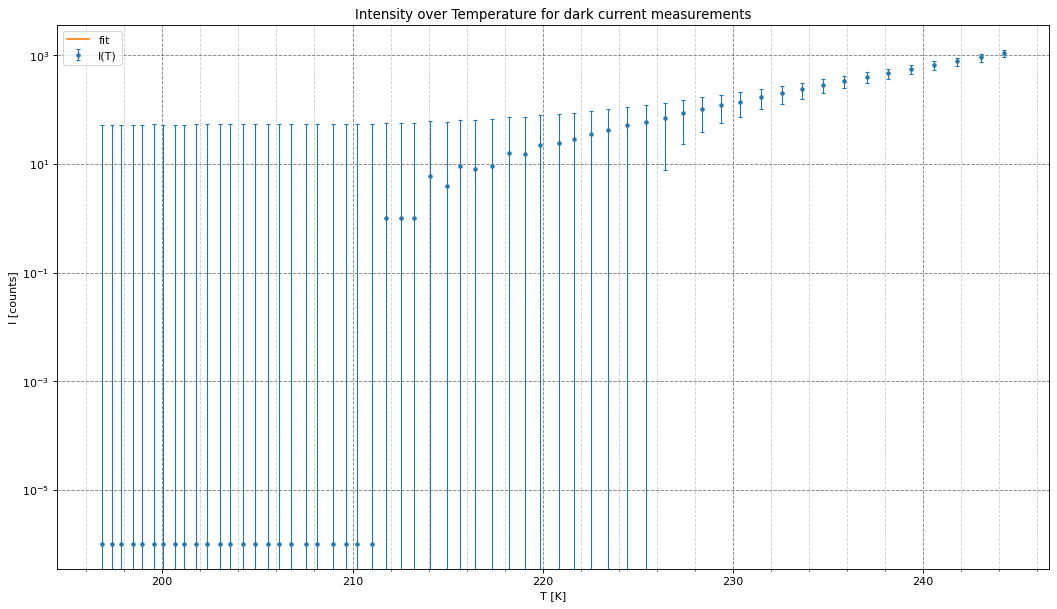

In [68]:
temperatures_np = np.asarray(temperatures)
temperatures_np = temperatures_np + 273.15

for i in range(len(dark_medians)):
    if dark_medians[i] <= 0:
        dark_medians[i] = 10**(-6)
print(dark_medians)
popt_dc, pcov_dc = curve_fit(dark_current, temperatures_np, dark_medians, sigma=dark_errors, p0=[dark_medians[0], 7.178*10**(18)])

plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(temperatures_np,dark_medians, yerr = dark_errors, linestyle='None', marker = ".", label="I(T)", capsize = 2, elinewidth=1)
plt.plot(temperatures_np, dark_current(temperatures_np, *popt_dc), label="fit")
plt.xlabel('T [K]')
plt.ylabel('I [counts]')
plt.title('Intensity over Temperature for dark current measurements')
plt.yscale('log')
plt.legend()
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()